# Installation and Import of packages, mount the drive

In [92]:
#pip install dataframe_image
pip install dataframe-image
# install the package to display the table from dataframe

SyntaxError: ignored

In [88]:
# Import the packages 
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import table
import dataframe_image as dfi

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# A scheme Beyond PPM

We temporarily call the scheme as Jonas. \\
We have 4 photons
<br>
14 timeslots
<br>
1 symbol created by 14 timeslots

## Sequence to design the length of time slot / time bin
We can generate the desired number of sequence we want from the below code.

A010672		A B_2 sequence: a(n) = least value such that sequence increases and pairwise sums of distinct elements are all distinct. \\
Author: 	Dan Hoey

1. https://oeis.org/A010672
2. https://oeis.org/A011185
3. https://oeis.org/A010672

The below function generates a list of 100 sequences.

In [93]:
from itertools import islice

def agen(): # generator of terms

    aset, sset, k = set(), set(), 0

    while True:

        k += 1

        while any(k+an in sset for an in aset): k += 1

        yield k; sset.update(k+an for an in aset); aset.add(k)
        
a = list(islice(agen(), 100))
b = list(map(lambda v: v-1, a))
print(b)

[0, 1, 2, 4, 7, 12, 20, 29, 38, 52, 73, 94, 127, 151, 181, 211, 257, 315, 373, 412, 475, 530, 545, 607, 716, 797, 861, 964, 1059, 1160, 1306, 1385, 1434, 1555, 1721, 1833, 1933, 2057, 2260, 2496, 2698, 2873, 3060, 3196, 3331, 3628, 3711, 3867, 4139, 4446, 4639, 5021, 5064, 5322, 5613, 6003, 6273, 6493, 6641, 6979, 7275, 7587, 8017, 8373, 9071, 9167, 9760, 10105, 10489, 11109, 11374, 11516, 12101, 12330, 12867, 13426, 13923, 14535, 14911, 15469, 15904, 16136, 16900, 17041, 17822, 19421, 19933, 20288, 20996, 21491, 22065, 22612, 22659, 23724, 24399, 24969, 25360, 26071, 26680, 27601]


In [94]:
len(b)

100

## The Number of Time Bin (Time Slot)
Let us consider the following sequence:
[0, 1, 2, 4, 7, 12, 20, 29, 38, 52, 73, 94, 127] as an example

Since we should have at least 1 photon in a time slot, we drop out the 1st term and start with the value 1.

The length of the nth time bin is the sum of the first nth sequence. 

In [5]:
l = [1, 2, 4, 7, 12, 20, 29, 38, 52, 73, 94, 127, 151, 181, 211] # or l = range(1, 21)
series = [sum(l[:i]) for i in range(1,len(l)+1)]
print (series)

[1, 3, 7, 14, 26, 46, 75, 113, 165, 238, 332, 459, 610, 791, 1002]


If we have 4 photons to encode into the superblock. We represent them into a sequence in a list as [1,2,4,7], which is encoded as follow: \\
H H0 H000 V000000, which comprie of 14 time slots.
We can find all the permutation, i.e. the number of ways to order them, which is 4! = 24. It means that we have 24 possible way to represent a symbol in this time bin.

In [6]:
# A Python program to print all 
# permutations using library function 
from itertools import permutations 
  
  
# Get all permutations of [1, 2, 3] 
perm = permutations([1, 2, 4, 7]) 

lists = []
# Print the obtained permutations 
for i in (perm): 
    #print (i)
    lists.append(i) 

lists

[(1, 2, 4, 7),
 (1, 2, 7, 4),
 (1, 4, 2, 7),
 (1, 4, 7, 2),
 (1, 7, 2, 4),
 (1, 7, 4, 2),
 (2, 1, 4, 7),
 (2, 1, 7, 4),
 (2, 4, 1, 7),
 (2, 4, 7, 1),
 (2, 7, 1, 4),
 (2, 7, 4, 1),
 (4, 1, 2, 7),
 (4, 1, 7, 2),
 (4, 2, 1, 7),
 (4, 2, 7, 1),
 (4, 7, 1, 2),
 (4, 7, 2, 1),
 (7, 1, 2, 4),
 (7, 1, 4, 2),
 (7, 2, 1, 4),
 (7, 2, 4, 1),
 (7, 4, 1, 2),
 (7, 4, 2, 1)]

# Number of ways to order the photons
$$n!$$

In [7]:
def ways(n):
    return math.factorial(n)

# Number of Bits per Symbol
It is the information content per symbol

$$ log_2{n!}$$

In [8]:
def bps(W):
    return math.log2(W)

# Number of Bits per Photon

In [9]:
def bpph(b,n):
    return b/n

# Number of Bits per Timeslot

In [10]:
def bpt(B, n, T):
    return B*n/T

In [11]:
bpph(bps(24), 4)*4/14

0.3274973214800826

# Putting all the functions together

In [212]:
series, series[4]

([1, 3, 7, 14, 26, 46, 75, 113, 165, 238, 332, 459, 610, 791, 1002], 26)

In [206]:


Jonasnumber = []
JonasPermutation = []
JonasBPS = []
JonasBPP = []
JonasBPT = []

series = [1, 3, 7, 14, 26, 46, 75, 113, 165, 238, 332, 459, 610, 791, 1002]

df_Jonas = pd.DataFrame(columns=['Photon Number ', 
                           'Time Bins',
                           'Permutation',
                           'Bits/Symbol', 
                           'Bits/Photon', 
                           'Bits/Time Bin']
                  )

for n in range(1,11):
    Jonasways = math.factorial(n)
    JonasTimeBin = series[n-1]
    Jonasbps = math.log2(Jonasways)
    Jonasbpp = math.log2(Jonasways) / n
    Jonasbpt = Jonasbpp * n/series[n-1]

    JonasTimeBin_SigFig = "{:.2e}".format(JonasTimeBin)
    Jonasways_SigFig = "{:.2e}".format(Jonasways)
    Jonasbps_round = round(Jonasbps, 2)
    Jonasbpp_round = round(Jonasbpp, 2)
    Jonasbpt_round = round(Jonasbpt, 2)
    Jonasbpt_round = round(Jonasbpt, 2)
    df_Jonas.loc[len(df_Jonas)] = [n, JonasTimeBin_SigFig, Jonasways_SigFig, Jonasbps_round, Jonasbpp_round, Jonasbpt_round] 

    #round(answer, 2)

In [207]:
# ax = plt.subplot(111, frame_on=False) # no visible frame
# ax.xaxis.set_visible(False) # hide the x axis
# ax.yaxis.set_visible(False) # hide the y axis
# table(ax, df_Jonas, loc='center', fontsize=12) # where df is your data frame
# plt.savefig('Jonas_Table.png', dpi = 450, figsize=(10, 10))

In [211]:
pd.set_option("display.max_column", None)
pd.set_option("display.max_colwidth", None)
pd.set_option('display.width', 3)
pd.set_option('display.max_rows', None)
pd.options.display.max_colwidth = 80

In [208]:
df_Jonas

,Photon Number,Time Bins,Permutation,Bits/Symbol,Bits/Photon,Bits/Time Bin
0,1,1.00e+00,1.00e+00,0.00,0.00,0.00
1,2,3.00e+00,2.00e+00,1.00,0.50,0.33
2,3,7.00e+00,6.00e+00,2.58,0.86,0.37
3,4,1.40e+01,2.40e+01,4.58,1.15,0.33
4,5,2.60e+01,1.20e+02,6.91,1.38,0.27
5,6,4.60e+01,7.20e+02,9.49,1.58,0.21
6,7,7.50e+01,5.04e+03,12.30,1.76,0.16
7,8,1.13e+02,4.03e+04,15.30,1.91,0.14
8,9,1.65e+02,3.63e+05,18.47,2.05,0.11
9,10,2.38e+02,3.63e+06,21.79,2.18,0.09


In [209]:
#df_Jonas = df_Jonas.style.background_gradient() #adding a gradient based on values in cell
dfi.export(
    df_Jonas,
    "Jonas_Table.png",
    table_conversion="matplotlib"
)

In [197]:
# display(file="Jonas_Table.png")

# Plot Graph

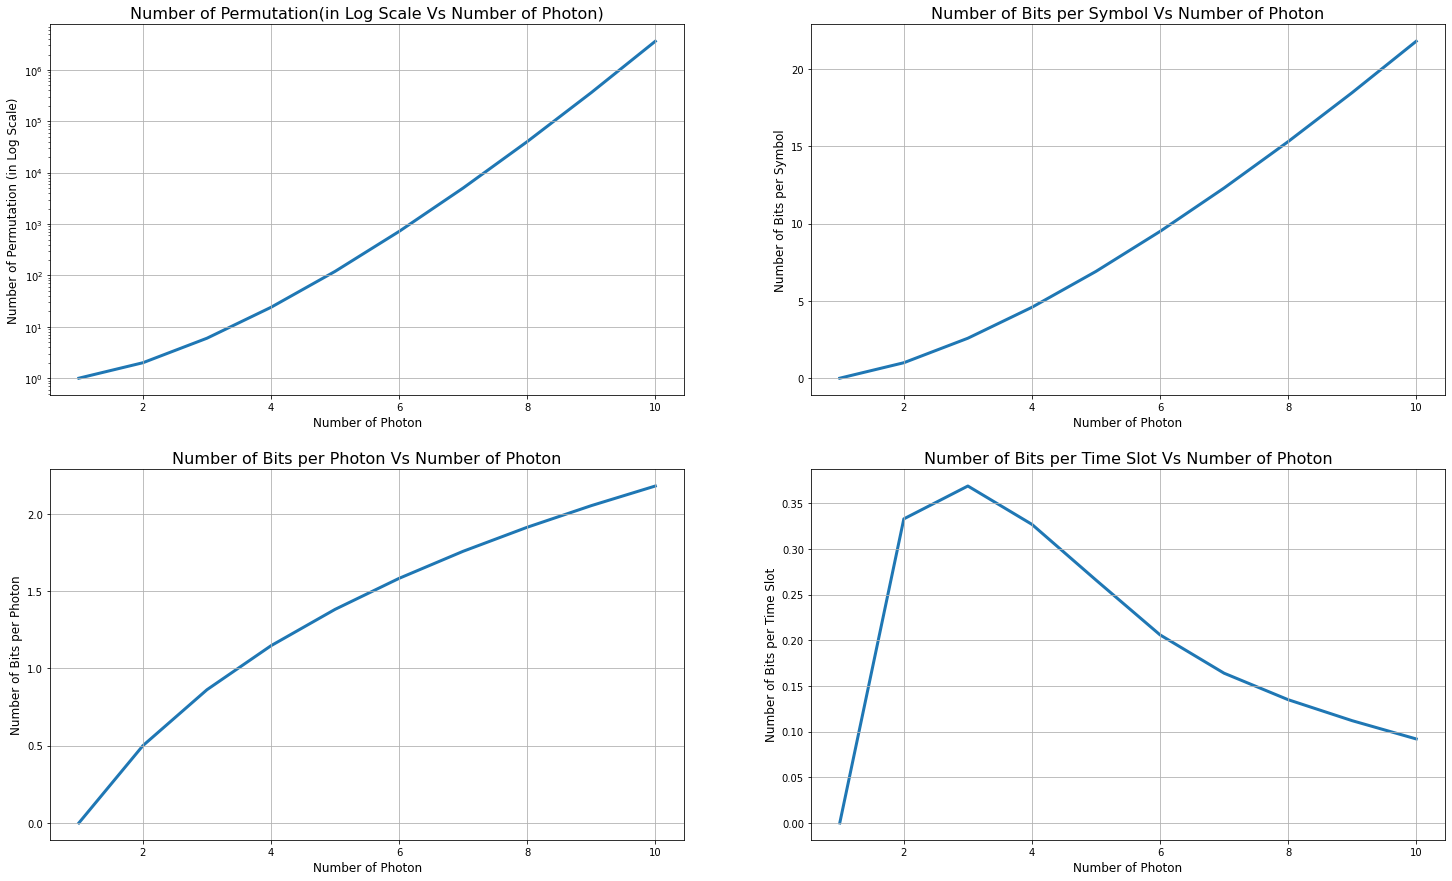

In [22]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_Jonas[df_Jonas.columns[0]],df_Jonas[df_Jonas.columns[1]],linewidth=3,zorder=1, label = "bits")
axis[0, 0].set_title('Number of Permutation(in Log Scale Vs Number of Photon)', fontsize = 16)
axis[0, 0].set_xlabel('Number of Photon', fontsize = 12)
axis[0, 0].set_ylabel('Number of Permutation (in Log Scale)', fontsize = 12)
axis[0, 0].set_yscale('log')
#axis[0, 0].set_xlim([0, 21])
axis[0, 0].grid(True)

axis[0, 1].plot(df_Jonas[df_Jonas.columns[0]],df_Jonas[df_Jonas.columns[2]],linewidth=3,zorder=1, label = "bits")
axis[0, 1].set_title('Number of Bits per Symbol Vs Number of Photon', fontsize = 16)
axis[0, 1].set_xlabel('Number of Photon', fontsize = 12)
axis[0, 1].set_ylabel('Number of Bits per Symbol', fontsize = 12)
axis[0, 1].grid(True)

axis[1, 0].plot(df_Jonas[df_Jonas.columns[0]],df_Jonas[df_Jonas.columns[3]],linewidth=3,zorder=1, label = "bits")

axis[1, 0].set_title('Number of Bits per Photon Vs Number of Photon', fontsize = 16)
axis[1, 0].set_xlabel('Number of Photon', fontsize = 12)
axis[1, 0].set_ylabel('Number of Bits per Photon', fontsize = 12)
axis[1, 0].grid(True)

axis[1, 1].plot(df_Jonas[df_Jonas.columns[0]],df_Jonas[df_Jonas.columns[4]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Number of Bits per Time Slot Vs Number of Photon', fontsize = 16)
axis[1, 1].set_xlabel('Number of Photon', fontsize = 12)
axis[1, 1].set_ylabel('Number of Bits per Time Slot', fontsize = 12)
axis[1, 1].grid(True)

figure.set_facecolor("white")
plt.savefig('Jonas_Plot.png', dpi=450, bbox_inches='tight')
plt.show()





In [23]:
# figure, ax1 = plt.subplots(figsize=(18,10))

# #ax = df1.plot(, xticks=range(0, 61), title = 'Detection Rate in Data 1')
# ax1.plot(df_Jonas[df_Jonas.columns[0]],df_Jonas[df_Jonas.columns[1]],linewidth=3,zorder=1, label = "bits")

# ax1.set_title('Number of Photon Vs Number of Permutation(in Log Scale)', fontsize = 16)

# ax1.set_xlabel('Number of Photon', fontsize = 12)
# ax1.set_ylabel('Number of Permutation (in Log Scale)', fontsize = 12)
# ax1.set_yscale('log')
# ax1.set_xlim([0, 21])
# #ax1.set_ylim([6000,7000])
# #ax2.set_ylim([6000,7000])

# ax1.grid(True)

# figure.set_facecolor("white")
# plt.savefig('Jonas_PhotonVsPermutation.png', dpi=300, bbox_inches='tight')

In [24]:
# figure, ax1 = plt.subplots(figsize=(18,10))

# #ax = df1.plot(, xticks=range(0, 61), title = 'Detection Rate in Data 1')
# ax1.plot(df_Jonas[df_Jonas.columns[0]],df_Jonas[df_Jonas.columns[2]],linewidth=3,zorder=1, label = "bits")


# ax1.set_title('Number of Photon Vs Number of Bits per Symbol', fontsize = 16)

# ax1.set_xlabel('Number of Photon', fontsize = 12)
# ax1.set_ylabel('Number of Bits per Symbol', fontsize = 12)

# #ax1.set_ylim([6000,7000])
# #ax2.set_ylim([6000,7000])

# ax1.grid(True)

# #figure.set_facecolor("white")
# plt.savefig('Jonas_PhotonVsBpS.png', dpi=300, bbox_inches='tight')

In [25]:
# figure, ax1 = plt.subplots(figsize=(18,10))

# #ax = df1.plot(, xticks=range(0, 61), title = 'Detection Rate in Data 1')
# ax1.plot(df_Jonas[df_Jonas.columns[0]],df_Jonas[df_Jonas.columns[3]],linewidth=3,zorder=1, label = "bits")

# ax1.set_title('Number of Photon Vs Number of Bits per Photon', fontsize = 16)

# ax1.set_xlabel('Number of Photon', fontsize = 12)
# ax1.set_ylabel('Number of Bits per Photon', fontsize = 12)

# #ax1.set_ylim([6000,7000])
# #ax2.set_ylim([6000,7000])

# ax1.grid(True)

# figure.set_facecolor("white")
# plt.savefig('Jonas_PhotonVsBpP.png', dpi=300, bbox_inches='tight')

In [26]:
# figure, ax1 = plt.subplots(figsize=(18,10))

# #ax = df1.plot(, xticks=range(0, 61), title = 'Detection Rate in Data 1')
# ax1.plot(df_Jonas[df_Jonas.columns[0]],df_Jonas[df_Jonas.columns[4]],linewidth=3, zorder=1, label = "bits")


# ax1.set_title('Number of Photon Vs Number of Bits per Time Slot', fontsize = 16)

# ax1.set_xlabel('Number of Photon', fontsize = 12)
# ax1.set_ylabel('Number of Bits per Time Slot', fontsize = 12)

# #ax1.set_ylim([6000,7000])
# #ax2.set_ylim([6000,7000])

# ax1.grid(True)

# figure.set_facecolor("white")
# plt.savefig('Jonas_PhotonVsTime.png', dpi=300, bbox_inches='tight')

# General

We have 4 photons
14 timeslots
1,0001 ways to order them by binomial where order does not matter and repeition are not allowed.
Permutations = r! x Combinations 

### Combination

### Permutation

In [216]:
# A Python program to print all permutations of given length 
from itertools import permutations 
  
# Get all permutations of length 2 
#perm = permutations([1, 2, 3], 2) 
  
# Print the obtained permutations 
#for i in list(perm): 
#    print (i) 

In [215]:
# Some elements are repeated, which is not a good method.
#  # A Python program to print all 
#  # permutations of given length 
#  from itertools import permutations 
  
#  # Get all permutations of length 2 
#  # and length 2 
#  perm = permutations([1, 2, 4, 7, 0,0,0,0,0], 2) 
  
#  # Print the obtained permutations 
#  for i in list(perm): 
#      print (i) 

In [217]:
def permutation(n,r):
  return math.factorial(n)/math.factorial(n-r)

In [220]:
Generalnumber_p = []
GeneralPermutation_p = []
GeneralBPS_p = []
GeneralBPP_p = []
GeneralBPT_p = []

df_General_p = pd.DataFrame(columns=['Number of Photon', 
                           'Number of Permutation', 
                           'Number of Bits per Symbol', 
                           'Number of Bits per Photon', 
                           'Number of Bits per Time Slots']
                  )

for n in range(1,11):
    Generalways_p = permutation(14,n)
    Generalbps_p = math.log2(Generalways_p)
    Generalbpp_p = math.log2(Generalways_p) / n
    Generalbpt_p = round(Generalbpp_p * n/14, 3)
    df_General_p.loc[len(df_General_p)] = [n, Generalways_p, Generalbps_p, Generalbpp_p, Generalbpt_p]

In [221]:
df_General_p

,Number of Photon,Number of Permutation,Number of Bits per Symbol,Number of Bits per Photon,Number of Bits per Time Slots
0,1.0,1.400000e+01,3.807355,3.807355,0.272
1,2.0,1.820000e+02,7.507795,3.753897,0.536
2,3.0,2.184000e+03,11.092757,3.697586,0.792
3,4.0,2.402400e+04,14.552189,3.638047,1.039
4,5.0,2.402400e+05,17.874117,3.574823,1.277
5,6.0,2.162160e+06,21.044042,3.507340,1.503
6,7.0,1.729728e+07,24.044042,3.434863,1.717
7,8.0,1.210810e+08,26.851397,3.356425,1.918
8,9.0,7.264858e+08,29.436359,3.270707,2.103
9,10.0,3.632429e+09,31.758287,3.175829,2.268


In [55]:
dfi.export(
    df_General_p,
    "General_p_Table.png",
    table_conversion="matplotlib"
)

In [56]:
# ax = plt.subplot(111, frame_on=False)

# ax = plt.subplot(111, frame_on=False) # no visible frame
# ax.xaxis.set_visible(False) # hide the x axis
# ax.yaxis.set_visible(False) # hide the y axis
# table(ax, df_General_p, loc='center', fontsize=12) # where df is your data frame
# plt.savefig('General_p_Table.png', dpi = 450)

In [222]:
def combination(n,r):
  return math.factorial(n) / (math.factorial(n-r)*math.factorial(r))

combination(14,4)

1001.0

In [58]:
Generalnumber_c = []
GeneralPermutation_c = []
GeneralBPS_c = []
GeneralBPP_c = []
GeneralBPT_c = []

df_General_c = pd.DataFrame(columns=['Number of Photon', 
                           'Number of Permutation', 
                           'Number of Bits per Symbol', 
                           'Number of Bits per Photon', 
                           'Number of Bits per Time Slots']
                  )

for n in range(1,11):
    Generalways_c = combination(14,n)
    Generalbps_c = math.log2(Generalways_c)
    Generalbpp_c = math.log2(Generalways_c) / n
    Generalbpt_c = round(Generalbpp_c * n/14, 3)
    df_General_c.loc[len(df_General_c)] = [n, Generalways_c, Generalbps_c, Generalbpp_c, Generalbpt_c]

In [59]:
dfi.export(
    df_General_c,
    "General_c_Table.png",
    table_conversion="matplotlib"
)

In [60]:
# ax = plt.subplot(111, frame_on=False)

# ax = plt.subplot(111, frame_on=False) # no visible frame
# ax.xaxis.set_visible(False) # hide the x axis
# ax.yaxis.set_visible(False) # hide the y axis
# table(ax, df_General_c, loc='center') # where df is your data frame
# plt.savefig('General_c_Table.png', dpi = 450)

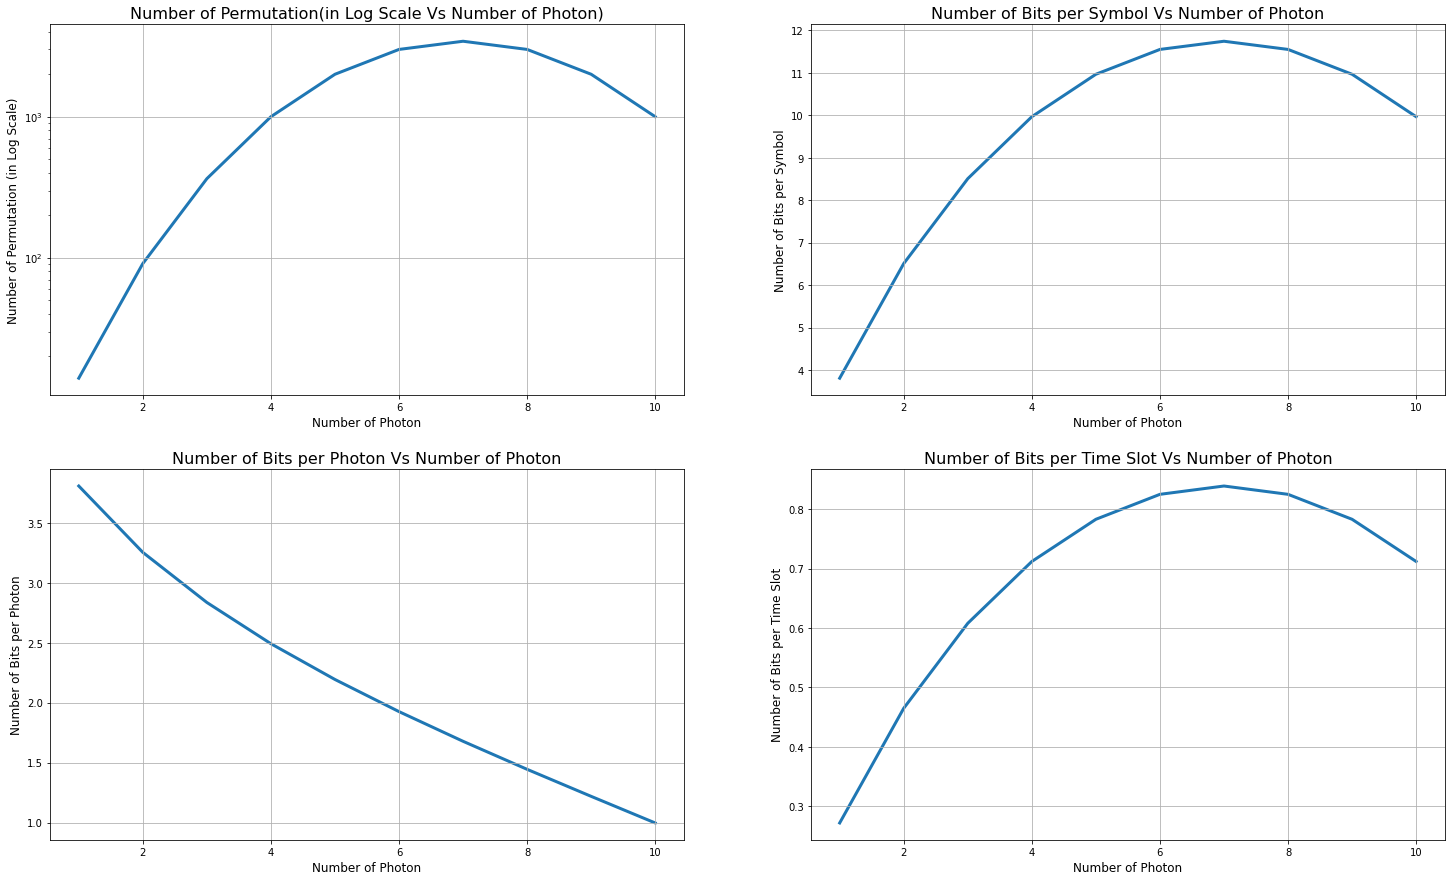

In [61]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_General_c[df_General_c.columns[0]],df_General_c[df_General_c.columns[1]],linewidth=3,zorder=1, label = "bits")
axis[0, 0].set_title('Number of Permutation(in Log Scale Vs Number of Photon)', fontsize = 16)
axis[0, 0].set_xlabel('Number of Photon', fontsize = 12)
axis[0, 0].set_ylabel('Number of Permutation (in Log Scale)', fontsize = 12)
axis[0, 0].set_yscale('log')
#axis[0, 0].set_yscale('log')
#axis[0, 0].set_xlim([0, 21])
axis[0, 0].grid(True)

axis[0, 1].plot(df_General_c[df_General_c.columns[0]],df_General_c[df_General_c.columns[2]],linewidth=3,zorder=1, label = "bits")
axis[0, 1].set_title('Number of Bits per Symbol Vs Number of Photon', fontsize = 16)
axis[0, 1].set_xlabel('Number of Photon', fontsize = 12)
axis[0, 1].set_ylabel('Number of Bits per Symbol', fontsize = 12)
axis[0, 1].grid(True)

axis[1, 0].plot(df_General_c[df_General_c.columns[0]],df_General_c[df_General_c.columns[3]],linewidth=3,zorder=1, label = "bits")
axis[1, 0].set_title('Number of Bits per Photon Vs Number of Photon', fontsize = 16)
axis[1, 0].set_xlabel('Number of Photon', fontsize = 12)
axis[1, 0].set_ylabel('Number of Bits per Photon', fontsize = 12)
axis[1, 0].grid(True)

axis[1, 1].plot(df_General_c[df_General_c.columns[0]],df_General_c[df_General_c.columns[4]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Number of Bits per Time Slot Vs Number of Photon', fontsize = 16)
axis[1, 1].set_xlabel('Number of Photon', fontsize = 12)
axis[1, 1].set_ylabel('Number of Bits per Time Slot', fontsize = 12)
axis[1, 1].grid(True)

figure.set_facecolor("white")
plt.savefig('General_c_Plot.png', dpi=450, bbox_inches='tight')
plt.show()

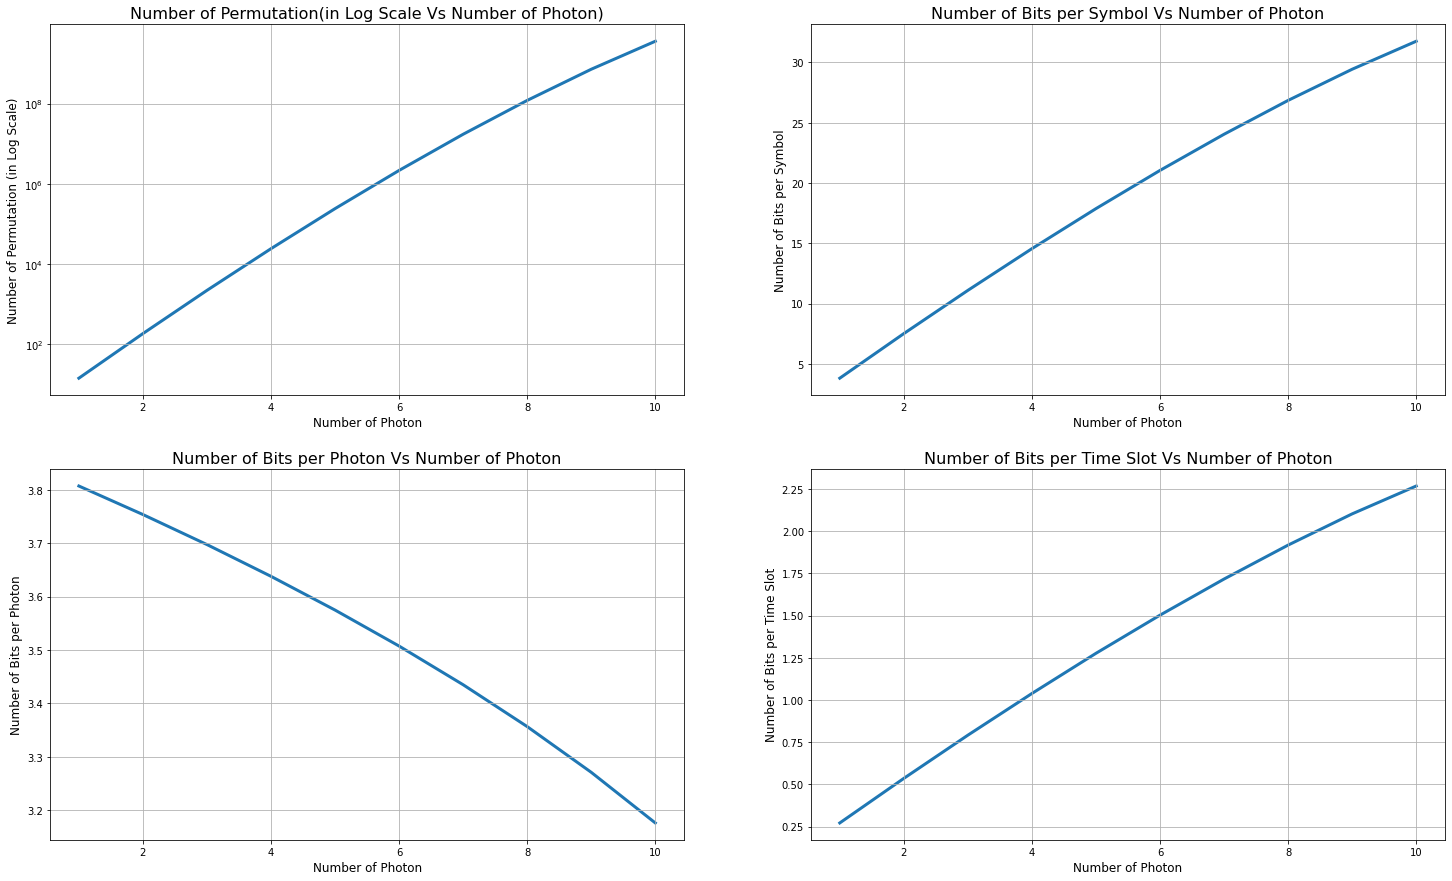

In [223]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_General_p[df_General_p.columns[0]],df_General_p[df_General_p.columns[1]],linewidth=3,zorder=1, label = "bits")
axis[0, 0].set_title('Number of Permutation(in Log Scale Vs Number of Photon)', fontsize = 16)
axis[0, 0].set_xlabel('Number of Photon', fontsize = 12)
axis[0, 0].set_ylabel('Number of Permutation (in Log Scale)', fontsize = 12)
axis[0, 0].set_yscale('log')
#axis[0, 0].set_yscale('log')
#axis[0, 0].set_xlim([0, 21])
axis[0, 0].grid(True)

axis[0, 1].plot(df_General_p[df_General_p.columns[0]],df_General_p[df_General_p.columns[2]],linewidth=3,zorder=1, label = "bits")
axis[0, 1].set_title('Number of Bits per Symbol Vs Number of Photon', fontsize = 16)
axis[0, 1].set_xlabel('Number of Photon', fontsize = 12)
axis[0, 1].set_ylabel('Number of Bits per Symbol', fontsize = 12)
axis[0, 1].grid(True)

axis[1, 0].plot(df_General_p[df_General_p.columns[0]],df_General_p[df_General_p.columns[3]],linewidth=3,zorder=1, label = "bits")
axis[1, 0].set_title('Number of Bits per Photon Vs Number of Photon', fontsize = 16)
axis[1, 0].set_xlabel('Number of Photon', fontsize = 12)
axis[1, 0].set_ylabel('Number of Bits per Photon', fontsize = 12)
axis[1, 0].grid(True)

axis[1, 1].plot(df_General_p[df_General_p.columns[0]],df_General_p[df_General_p.columns[4]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Number of Bits per Time Slot Vs Number of Photon', fontsize = 16)
axis[1, 1].set_xlabel('Number of Photon', fontsize = 12)
axis[1, 1].set_ylabel('Number of Bits per Time Slot', fontsize = 12)
axis[1, 1].grid(True)

figure.set_facecolor("white")
plt.savefig('General_p_Plot.png', dpi=450, bbox_inches='tight')
plt.show()


# PPM

We have 1 photon
<br>
14 timeslots
<br>
14 ways to order them

In [27]:
PPMnumber = []
PPMPermutation = []
PPMBPS = []
PPMBPP = []
PPMBPT = []

series = [1, 3, 7, 14, 26, 46, 75, 113, 165, 238, 332, 459, 610, 791, 1002]

df_PPM = pd.DataFrame(columns=['Number of Photon', 
                           'Number of Permutation', 
                           'Number of Bits per Symbol', 
                           'Number of Bits per Photon', 
                           'Number of Bits per Time Slots']
                  )
T =14
for n in range(1,11):
    PPMways = series[n-1]
    PPMbps = math.log2(PPMways)
    PPMbpp = math.log2(PPMways) / 1
    PPMbpt = round(PPMbpp * n/series[n-1], 3)
    df_PPM.loc[len(df_PPM)] = [n, PPMways, PPMbps, PPMbpp, PPMbpt] 

In [28]:
PPMways

238

In [29]:
#def PPMbpt(T, n):
#    def PPMbpph(n):
#        def PPMbps(n):
#            def PPMways(T):
#                return T
#            return math.log2(T)
#        return math.log2(T) / n
#    return print([n], "Number of wyas:", ways(n), 
#                 "Number of Bits per Symbol:", math.log2(ways(n)), 
#                 "Number of Bits per Photon: ", math.log2(ways(n)) / n, 
#                 "Number of Bits per Timeslot", math.log2(ways(n)) / n*(n/T)
#                )

In [30]:
# df_PPM.style

In [31]:
# ax = plt.subplot(111, frame_on=False)

# ax = plt.subplot(111, frame_on=False) # no visible frame
# ax.xaxis.set_visible(False) # hide the x axis
# ax.yaxis.set_visible(False) # hide the y axis
# table(ax, df_PPM, loc='center',fontsize=12) # where df is your data frame
# plt.savefig('PPM_Table.png', dpi = 450)

In [32]:
dfi.export(
    df_PPM,
    "PPM_Table.png",
    table_conversion="matplotlib"
)

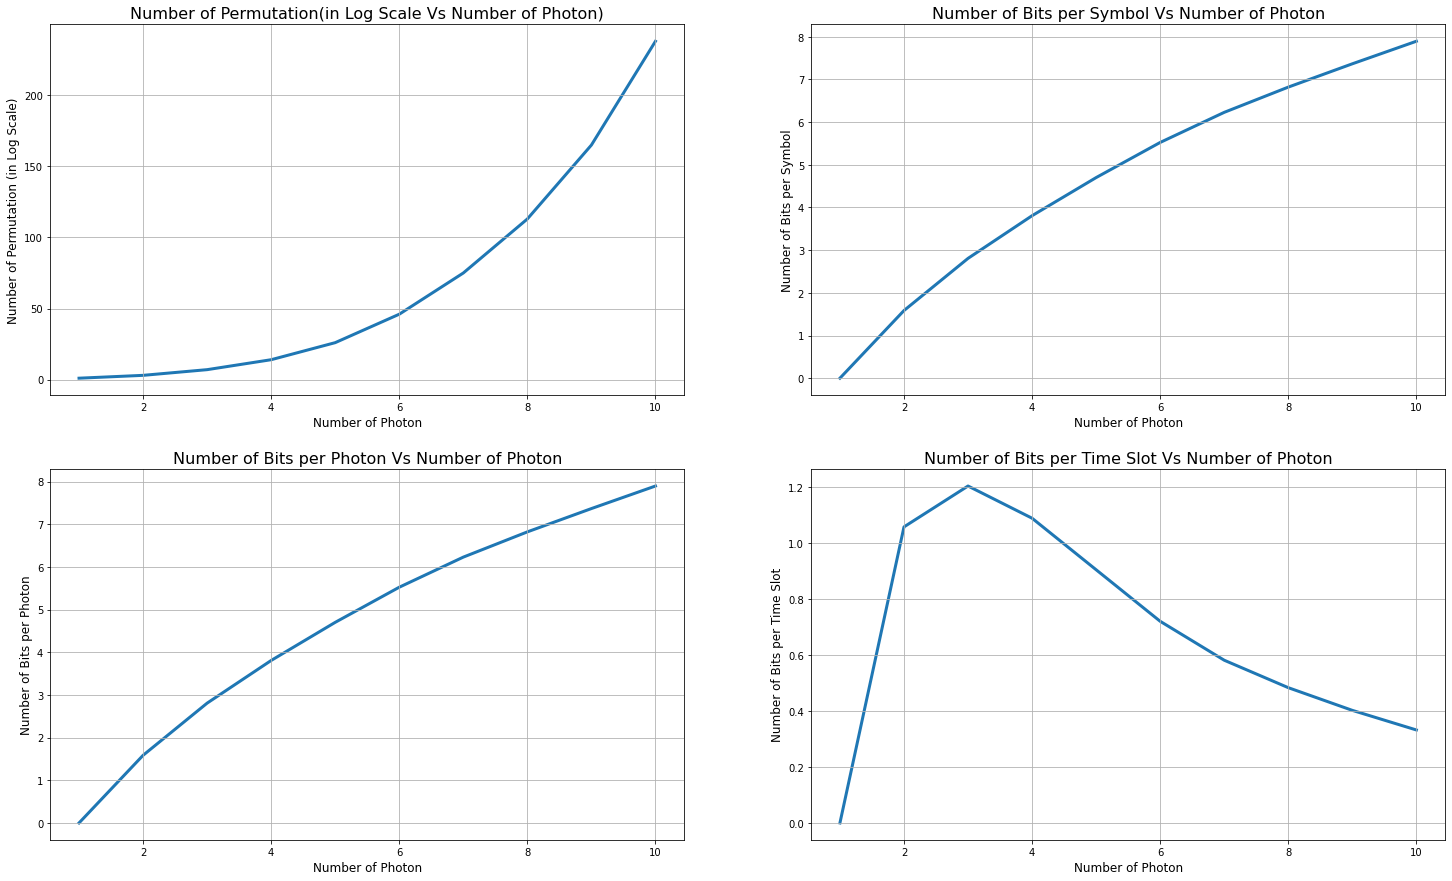

In [33]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_PPM[df_PPM.columns[0]],df_PPM[df_PPM.columns[1]],linewidth=3,zorder=1, label = "bits")
axis[0, 0].set_title('Number of Permutation(in Log Scale Vs Number of Photon)', fontsize = 16)
axis[0, 0].set_xlabel('Number of Photon', fontsize = 12)
axis[0, 0].set_ylabel('Number of Permutation (in Log Scale)', fontsize = 12)
#axis[0, 0].set_yscale('log')
#axis[0, 0].set_xlim([0, 21])
axis[0, 0].grid(True)

axis[0, 1].plot(df_PPM[df_PPM.columns[0]],df_PPM[df_PPM.columns[2]],linewidth=3,zorder=1, label = "bits")
axis[0, 1].set_title('Number of Bits per Symbol Vs Number of Photon', fontsize = 16)
axis[0, 1].set_xlabel('Number of Photon', fontsize = 12)
axis[0, 1].set_ylabel('Number of Bits per Symbol', fontsize = 12)
axis[0, 1].grid(True)

axis[1, 0].plot(df_PPM[df_PPM.columns[0]],df_PPM[df_PPM.columns[3]],linewidth=3,zorder=1, label = "bits")
axis[1, 0].set_title('Number of Bits per Photon Vs Number of Photon', fontsize = 16)
axis[1, 0].set_xlabel('Number of Photon', fontsize = 12)
axis[1, 0].set_ylabel('Number of Bits per Photon', fontsize = 12)
axis[1, 0].grid(True)

axis[1, 1].plot(df_PPM[df_PPM.columns[0]],df_PPM[df_PPM.columns[4]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Number of Bits per Time Slot Vs Number of Photon', fontsize = 16)
axis[1, 1].set_xlabel('Number of Photon', fontsize = 12)
axis[1, 1].set_ylabel('Number of Bits per Time Slot', fontsize = 12)
axis[1, 1].grid(True)

figure.set_facecolor("white")
plt.savefig('PPM_Plot.png', dpi=450, bbox_inches='tight')
plt.show()


In [34]:
# figure, ax1 = plt.subplots(figsize=(18,10))

# #ax = df1.plot(, xticks=range(0, 61), title = 'Detection Rate in Data 1')
# ax1.plot(df_PPM[df_PPM.columns[0]],df_PPM[df_PPM.columns[1]],linewidth=3,zorder=1, label = "bits")

# ax1.set_title('Number of Photon Vs Number of Permutation', fontsize = 16)

# ax1.set_xlabel('Number of Photon', fontsize = 12)
# ax1.set_ylabel('Number of Permutation', fontsize = 12)
# #ax1.set_yscale('log')
# ax1.set_ylim([0,20])
# #ax2.set_ylim([6000,7000])

# ax1.grid(True)

# figure.set_facecolor("white")
# plt.savefig('PPM_PhotonVsPermutation.png', dpi=300, bbox_inches='tight')

In [35]:
# figure, ax1 = plt.subplots(figsize=(18,10))

# #ax = df1.plot(, xticks=range(0, 61), title = 'Detection Rate in Data 1')
# ax1.plot(df_PPM[df_PPM.columns[0]],df_PPM[df_PPM.columns[2]],linewidth=3,zorder=1, label = "bits")


# ax1.set_title('Number of Photon Vs Number of Bits per Symbol', fontsize = 16)

# ax1.set_xlabel('Number of Photon', fontsize = 12)
# ax1.set_ylabel('Number of Bits per Symbol', fontsize = 12)

# ax1.set_ylim([0,5.0])
# #ax2.set_ylim([6000,7000])

# ax1.grid(True)

# #figure.set_facecolor("white")
# plt.savefig('PPM_PhotonVsBpS.png', dpi=300, bbox_inches='tight')

In [36]:
# figure, ax1 = plt.subplots(figsize=(18,10))

# #ax = df1.plot(, xticks=range(0, 61), title = 'Detection Rate in Data 1')
# ax1.plot(df_PPM[df_PPM.columns[0]],df_PPM[df_PPM.columns[3]],linewidth=3,zorder=1, label = "bits")

# ax1.set_title('Number of Photon Vs Number of Bits per Photon', fontsize = 16)

# ax1.set_xlabel('Number of Photon', fontsize = 12)
# ax1.set_ylabel('Number of Bits per Photon', fontsize = 12)

# #ax1.set_ylim([6000,7000])
# #ax2.set_ylim([6000,7000])

# ax1.grid(True)

# figure.set_facecolor("white")
# plt.savefig('PPM_PhotonVsBpP.png', dpi=300, bbox_inches='tight')

In [37]:
# figure, ax1 = plt.subplots(figsize=(18,10))

# #ax = df1.plot(, xticks=range(0, 61), title = 'Detection Rate in Data 1')
# ax1.plot(df_PPM[df_PPM.columns[0]],df_PPM[df_PPM.columns[4]],linewidth=3,zorder=1, label = "bits")


# ax1.set_title('Number of Photon Vs Number of Bits per Time Slot', fontsize = 16)

# ax1.set_xlabel('Number of Photon', fontsize = 12)
# ax1.set_ylabel('Number of Bits per Time Slot', fontsize = 12)

# #ax1.set_ylim([6000,7000])
# #ax2.set_ylim([6000,7000])

# ax1.grid(True)

# figure.set_facecolor("white")
# plt.savefig('PPM_PhotonVsTime.png', dpi=300, bbox_inches='tight')

### Permutation

# OOK

In [38]:
#def OOKbpt(T, n):
#  def OOKbpph(n, T):
#    def OOKbps(T):
#      def OOKways(T):
#        return (2)**T
#      return math.log2((2)**T)
#    return math.log2((2)**T) / n
#  return print(
#                 [n], 
#                 "Number of Permutation:", OOKways(T), 
#                 "Number of Bits per Symbol:", math.log2(OOKways(T)), 
#                 "Number of Bits per Photon: ", math.log2(OOKways(T)) / n, 
#                 "Number of Bits per Timeslot", math.log2(OOKways(T)) / n*(n/T)
#                 )

In [39]:
OOKnumber = []
OOKPermutation = []
OOKBPS = []
OOKBPP = []
OOKBPT = []

df_OOK = pd.DataFrame(columns=['Number of Photon', 
                           'Number of Permutation', 
                           'Number of Bits per Symbol', 
                           'Number of Bits per Photon', 
                           'Number of Bits per Time Slots']
                  )
T =14
for n in range(1,11):
    OOKways = (2)**series[n-1]
    OOKbps = math.log2(OOKways)
    #OOKbpp = (math.log2(OOKways) / n)/7
    OOKbpp = 2
    OOKbpt = round(OOKbpp * n/series[n-1], 3)
    df_OOK.loc[len(df_OOK)] = [n, OOKways, OOKbps, OOKbpp, OOKbpt] 

In [40]:
# df_OOK.style

In [41]:
# df_OOK

In [42]:
# ax = plt.subplot(111, frame_on=False)

# ax = plt.subplot(111, frame_on=False) # no visible frame
# ax.xaxis.set_visible(False) # hide the x axis
# ax.yaxis.set_visible(False) # hide the y axis
# table(ax, df_OOK, loc='center') # where df is your data frame
# plt.savefig('OOK_Table.png', dpi = 450)

In [43]:
dfi.export(
    df_OOK,
    "OOK_Table.png",
    table_conversion="matplotlib"
)

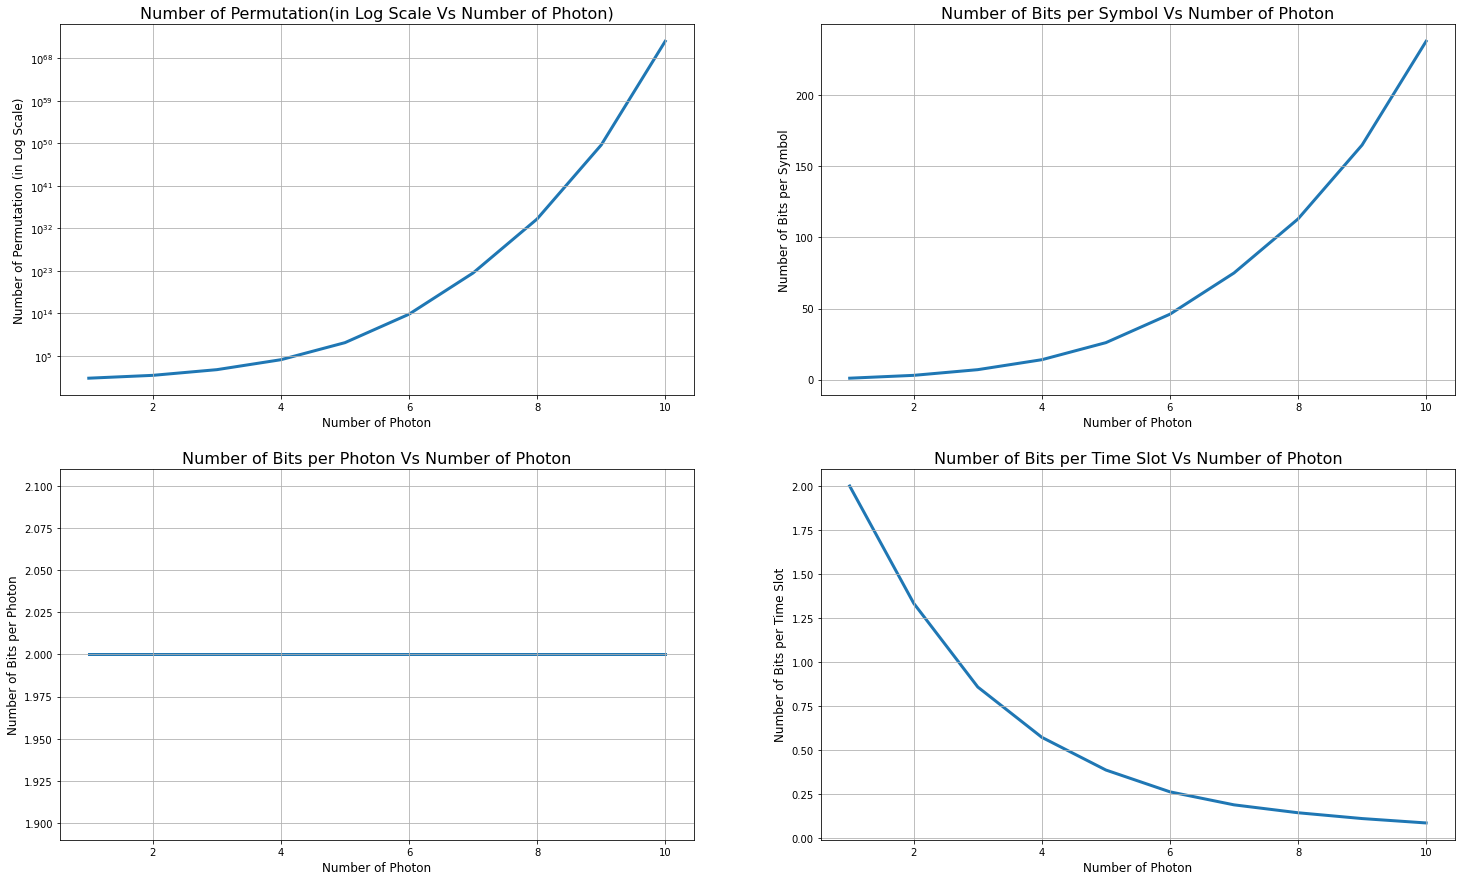

In [44]:
figure, axis = plt.subplots(2,2,figsize=(25,15))

axis[0, 0].plot(df_OOK[df_OOK.columns[0]],df_OOK[df_OOK.columns[1]],linewidth=3,zorder=1, label = "bits")

axis[0, 0].set_title('Number of Permutation(in Log Scale Vs Number of Photon)', fontsize = 16)
axis[0, 0].set_xlabel('Number of Photon', fontsize = 12)
axis[0, 0].set_ylabel('Number of Permutation (in Log Scale)', fontsize = 12)
axis[0, 0].set_yscale('log')
#axis[0, 0].set_yscale('log')
#axis[0, 0].set_xlim([0, 21])
axis[0, 0].grid(True)

axis[0, 1].plot(df_OOK[df_OOK.columns[0]],df_OOK[df_OOK.columns[2]],linewidth=3,zorder=1, label = "bits")
axis[0, 1].set_title('Number of Bits per Symbol Vs Number of Photon', fontsize = 16)
axis[0, 1].set_xlabel('Number of Photon', fontsize = 12)
axis[0, 1].set_ylabel('Number of Bits per Symbol', fontsize = 12)
axis[0, 1].grid(True)

axis[1, 0].plot(df_OOK[df_OOK.columns[0]],df_OOK[df_OOK.columns[3]],linewidth=3,zorder=1, label = "bits")
axis[1, 0].set_title('Number of Bits per Photon Vs Number of Photon', fontsize = 16)
axis[1, 0].set_xlabel('Number of Photon', fontsize = 12)
axis[1, 0].set_ylabel('Number of Bits per Photon', fontsize = 12)
axis[1, 0].grid(True)

axis[1, 1].plot(df_OOK[df_OOK.columns[0]],df_OOK[df_OOK.columns[4]],linewidth=3, zorder=1, label = "bits")
axis[1, 1].set_title('Number of Bits per Time Slot Vs Number of Photon', fontsize = 16)
axis[1, 1].set_xlabel('Number of Photon', fontsize = 12)
axis[1, 1].set_ylabel('Number of Bits per Time Slot', fontsize = 12)
axis[1, 1].grid(True)

figure.set_facecolor("white")
plt.savefig('OOK_Plot.png', dpi=450, bbox_inches='tight')
plt.show()

In [45]:
# figure, ax1 = plt.subplots(figsize=(18,10))

# #ax = df1.plot(, xticks=range(0, 61), title = 'Detection Rate in Data 1')
# ax1.plot(df_OOK[df_OOK.columns[0]],df_OOK[df_OOK.columns[1]],linewidth=3,zorder=1, label = "bits")

# ax1.set_title('Number of Photon Vs Number of Permutation', fontsize = 16)

# ax1.set_xlabel('Number of Photon', fontsize = 12)
# ax1.set_ylabel('Number of Permutation', fontsize = 12)
# #ax1.set_yscale('log')
# #ax1.set_ylim([0,20])
# #ax2.set_ylim([6000,7000])

# ax1.grid(True)

# figure.set_facecolor("white")
# plt.savefig('OOK_PhotonVsPermutation.png', dpi=300, bbox_inches='tight')

In [46]:
# figure, ax1 = plt.subplots(figsize=(18,10))

# #ax = df1.plot(, xticks=range(0, 61), title = 'Detection Rate in Data 1')
# ax1.plot(df_OOK[df_OOK.columns[0]],df_OOK[df_OOK.columns[2]],linewidth=3,zorder=1, label = "bits")


# ax1.set_title('Number of Photon Vs Number of Bits per Symbol', fontsize = 16)

# ax1.set_xlabel('Number of Photon')
# ax1.set_ylabel('Number of Bits per Symbol')

# #ax1.set_ylim([0,5.0])
# #ax2.set_ylim([6000,7000])

# ax1.grid(True)

# #figure.set_facecolor("white")
# plt.savefig('OOK_PhotonVsBpS.png', dpi=300, bbox_inches='tight')

In [47]:
# figure, ax1 = plt.subplots(figsize=(18,10))

# #ax = df1.plot(, xticks=range(0, 61), title = 'Detection Rate in Data 1')
# ax1.plot(df_OOK[df_OOK.columns[0]],df_OOK[df_OOK.columns[3]],linewidth=3,zorder=1, label = "bits")

# ax1.set_title('Number of Photon Vs Number of Bits per Photon', fontsize = 16)

# ax1.set_xlabel('Number of Photon', fontsize = 12)
# ax1.set_ylabel('Number of Bits per Photon', fontsize = 12)

# #ax1.set_ylim([6000,7000])
# #ax2.set_ylim([6000,7000])

# ax1.grid(True)

# figure.set_facecolor("white")
# plt.savefig('OOK_PhotonVsBpP.png', dpi=300, bbox_inches='tight')

In [48]:
# figure, ax1 = plt.subplots(figsize=(18,10))

# #ax = df1.plot(, xticks=range(0, 61), title = 'Detection Rate in Data 1')
# ax1.plot(df_OOK[df_OOK.columns[0]],df_OOK[df_OOK.columns[4]],linewidth=3,zorder=1, label = "bits")


# ax1.set_title('Number of Photon Vs Number of Bits per Time Slot', fontsize = 16)

# ax1.set_xlabel('Number of Photon', fontsize = 12)
# ax1.set_ylabel('Number of Bits per Time Slot', fontsize = 12)

# #ax1.set_ylim([6000,7000])
# #ax2.set_ylim([6000,7000])

# ax1.grid(True)

# figure.set_facecolor("white")
# plt.savefig('OOK_PhotonVsTime.png', dpi=300, bbox_inches='tight')

# Hamming Distance

In [62]:
# Using scipy to calculate the Hamming distance 
from scipy.spatial.distance import hamming

values1 = [1, 1, 0, 0, 1]
values2 = [0, 1, 0, 0, 0]

values3 = [1, 0, 1, 1, 0, 1]
values4 = [0, 0, 1, 1, 0, 0]

hamming_distance_1 = hamming(values1, values2) * len(values1)

hamming_distance_2 = hamming(values3, values4) * len(values3)

print(hamming_distance_1)

print(hamming_distance_2)

2.0
2.0


In [63]:
hamming(values1, values2)

0.4

In [64]:
hamming(values3, values4)

0.3333333333333333

# TC-MPPM Constellations
Practical PPM systems with w = 1 typically use n = 2,4,6,8, 16, etc. 



5C3

In [65]:
# # # A Python program to print all 
# # # permutations using library function 
# from itertools import permutations, combinations
  
  
# # # Get all permutations of [1, 2, 3] 
# perm = permutations([1, 1, 1, 0, 0]) 
# # com = combinations([1, 1, 1, 0, 0],3)   
# # # Print the obtained permutations 
# for i in list(perm): 
#      print (i) 

In [66]:
values51 = [1, 1, 1, 0, 0]
values52 = [0, 0, 1, 1, 1]
values53 = [1, 1, 0, 0, 0]
values54 = [1, 1, 1, 0, 0]
values55 = [0, 1, 0, 1, 0]
values56 = [0, 1, 1, 1, 0] 

hamming_distance_51 = hamming(values51, values52) * len(values51) # 4/5 difference * 5
hamming_distance_52 = hamming(values51, values53) * len(values51) # 1/5 difference * 5
hamming_distance_53 = hamming(values51, values54) * len(values54) # 0/5 difference * 5
hamming_distance_54 = hamming(values52, values53) * len(values52) # 5/5 difference * 5
hamming_distance_55 = hamming(values54, values55) * len(values52) # 3/5 difference * 5
hamming_distance_56 = hamming(values51, values56) * len(values52) # 2/5 difference * 5

print(hamming(values51, values52), 
      hamming(values51, values53), 
      hamming(values51, values54), 
      hamming(values52, values53), 
      hamming(values51, values56))

print(len(values51), 
      len(values52), 
      len(values53), 
      len(values54), 
      len(values55), 
      len(values56))

print(hamming_distance_53)
print(hamming_distance_52)
print(hamming_distance_56)
print(hamming_distance_55)
print(hamming_distance_51)
print(hamming_distance_54)

0.8 0.2 0.0 1.0 0.4
5 5 5 5 5 5
0.0
1.0
2.0
3.0
4.0
5.0


# Draft

In [67]:
# A Python program to print all 
# permutations using library function 
from itertools import permutations 
  
  
# Get all permutations of [1, 2, 3] 
perm = permutations([1, 2, 4, 7]) 

lists = []
# Print the obtained permutations 
for i in (perm): 
    #print (i)
    lists.append(i) 

lists

[(1, 2, 4, 7),
 (1, 2, 7, 4),
 (1, 4, 2, 7),
 (1, 4, 7, 2),
 (1, 7, 2, 4),
 (1, 7, 4, 2),
 (2, 1, 4, 7),
 (2, 1, 7, 4),
 (2, 4, 1, 7),
 (2, 4, 7, 1),
 (2, 7, 1, 4),
 (2, 7, 4, 1),
 (4, 1, 2, 7),
 (4, 1, 7, 2),
 (4, 2, 1, 7),
 (4, 2, 7, 1),
 (4, 7, 1, 2),
 (4, 7, 2, 1),
 (7, 1, 2, 4),
 (7, 1, 4, 2),
 (7, 2, 1, 4),
 (7, 2, 4, 1),
 (7, 4, 1, 2),
 (7, 4, 2, 1)]

In [68]:
def differences(a, b):
    if len(a) != len(b):
        raise ValueError("Lists of different length.")
    return sum(i != j for i, j in zip(a, b))
    return 

In [69]:
# differences(lists[0], lists[1])
# for i in range()

In [70]:
List1 = [10,10,11,12,15,16,18,19]
List2 = [10,11,13,15,16,19,20]
List3 = [10,11,11,12,15,19,21,23]

inter = set(List1).intersection(List2, List3)

diff3 = set(List3).difference(inter)

print(diff3)
set([12, 21, 23])

{12, 21, 23}


{12, 21, 23}

In [71]:
# A Python program to print all 
# permutations using library function 
from itertools import permutations 
  
  
# Get all permutations of [1, 2, 3] 
perm = permutations([1, 1, 0, 0]) 

lists = []
# Print the obtained permutations 
for i in (perm): 
    #print (i)
    lists.append(i) 
lists

[(1, 1, 0, 0),
 (1, 1, 0, 0),
 (1, 0, 1, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 0, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 0),
 (1, 0, 1, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 0, 1),
 (0, 0, 1, 1),
 (0, 0, 1, 1),
 (0, 1, 1, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 0, 1),
 (0, 0, 1, 1),
 (0, 0, 1, 1)]

In [72]:
from sympy.utilities.iterables import multiset_permutations
from sympy import factorial
from pprint import pprint

In [73]:
pprint(list(multiset_permutations([1,1,1,0,0,0])))

[[0, 0, 0, 1, 1, 1],
 [0, 0, 1, 0, 1, 1],
 [0, 0, 1, 1, 0, 1],
 [0, 0, 1, 1, 1, 0],
 [0, 1, 0, 0, 1, 1],
 [0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 1, 0],
 [0, 1, 1, 0, 0, 1],
 [0, 1, 1, 0, 1, 0],
 [0, 1, 1, 1, 0, 0],
 [1, 0, 0, 0, 1, 1],
 [1, 0, 0, 1, 0, 1],
 [1, 0, 0, 1, 1, 0],
 [1, 0, 1, 0, 0, 1],
 [1, 0, 1, 0, 1, 0],
 [1, 0, 1, 1, 0, 0],
 [1, 1, 0, 0, 0, 1],
 [1, 1, 0, 0, 1, 0],
 [1, 1, 0, 1, 0, 0],
 [1, 1, 1, 0, 0, 0]]


In [74]:
# len(a[0])

In [75]:
for i in a:
  print(i)

1
2
3
5
8
13
21
30
39
53
74
95
128
152
182
212
258
316
374
413
476
531
546
608
717
798
862
965
1060
1161
1307
1386
1435
1556
1722
1834
1934
2058
2261
2497
2699
2874
3061
3197
3332
3629
3712
3868
4140
4447
4640
5022
5065
5323
5614
6004
6274
6494
6642
6980
7276
7588
8018
8374
9072
9168
9761
10106
10490
11110
11375
11517
12102
12331
12868
13427
13924
14536
14912
15470
15905
16137
16901
17042
17823
19422
19934
20289
20997
21492
22066
22613
22660
23725
24400
24970
25361
26072
26681
27602


In [76]:
a = list(multiset_permutations([1,1,1,0,0,0]))
for i in a:
    print(len(i))

6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6


6C3

In [77]:
differences(a[1], a[6])

4

In [78]:
# [''.join(i) for i in multiset_permutations('aab')]
# ['aab', 'aba', 'baa']
# len(list(multiset_permutations('banana')))

In [79]:
pprint(list(multiset_permutations([1,1,1,0,0,0])))

[[0, 0, 0, 1, 1, 1],
 [0, 0, 1, 0, 1, 1],
 [0, 0, 1, 1, 0, 1],
 [0, 0, 1, 1, 1, 0],
 [0, 1, 0, 0, 1, 1],
 [0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 1, 0],
 [0, 1, 1, 0, 0, 1],
 [0, 1, 1, 0, 1, 0],
 [0, 1, 1, 1, 0, 0],
 [1, 0, 0, 0, 1, 1],
 [1, 0, 0, 1, 0, 1],
 [1, 0, 0, 1, 1, 0],
 [1, 0, 1, 0, 0, 1],
 [1, 0, 1, 0, 1, 0],
 [1, 0, 1, 1, 0, 0],
 [1, 1, 0, 0, 0, 1],
 [1, 1, 0, 0, 1, 0],
 [1, 1, 0, 1, 0, 0],
 [1, 1, 1, 0, 0, 0]]


In [80]:
values61 = [1, 1, 1, 0, 0, 0]
values65 = [1, 0, 1, 0, 1, 0]
values62 = [1, 1, 1, 0, 0, 0]
values63 = [0, 1, 1, 1, 0, 0]
values64 = [0, 0, 1, 1, 1, 0]
values64 = [0, 0, 0, 1, 1, 1]


hamming_distance_61 = hamming(values61, values62) * len(values61) # 0/6 difference
hamming_distance_62 = hamming(values61, values63) * len(values61) # 1/6 difference
hamming_distance_63 = hamming(values61, values64) * len(values61) # 2/6 difference=
hamming_distance_64 = hamming(values61, values65) * len(values61) # 


print(hamming(values61, values62), 
      hamming(values61, values63), 
      hamming(values61, values64),
      hamming(values61, values65)
      )

print(len(values61), 
      len(values62), 
      len(values63), 
      len(values64)
      )

print(hamming_distance_61)
print(hamming_distance_62)
print(hamming_distance_63)
print(hamming_distance_64)

0.0 0.3333333333333333 1.0 0.3333333333333333
6 6 6 6
0.0
2.0
6.0
2.0


In [81]:
import itertools
a = [1,2,3]
b = [4,5]
c = [-1]
# result contains all possible combinations.
combinations = list(itertools.product(a,b,c))
combinations

[(1, 4, -1), (1, 5, -1), (2, 4, -1), (2, 5, -1), (3, 4, -1), (3, 5, -1)]

In [82]:
combinations = list(itertools.product(a,b,c))

7C3

In [83]:
values71 = [1, 0, 1, 0, 0, 1, 0]
values72 = [0, 1, 0, 0, 1, 0, 1]
hamming_distance_7 = hamming(values71, values72) * len(values71)
print(hamming_distance_7) 

6.0


In [84]:
from itertools import combinations
s1 = pd.Series([1,1,1,0,0])
s2 = pd.Series([1,1,1,0,0])

x = combinations(s1, 2)
y = combinations(s2, 2)

dfx = pd.DataFrame(list(x)).rename(columns=lambda x: x+1).add_prefix('x')
dfy = pd.DataFrame(list(y)).rename(columns=lambda x: x+1).add_prefix('y')
df = pd.concat([dfx, dfy], axis=1)

m1 = (df.x1 > df.x2) & (df.y1 > df.y2)
m2 = (df.x1 < df.x2) & (df.y1 < df.y2)
# m3 = 
# m4 = 
# m5 = 
m = m1 | m2

print (m)

0    False
1    False
2     True
3     True
4    False
5     True
6     True
7     True
8     True
9    False
dtype: bool


In [85]:
df['score'] = np.where(m, m.cumsum(), 0)
print (df)

   x1  x2  y1  y2  score
0   1   1   1   1      0
1   1   1   1   1      0
2   1   0   1   0      1
3   1   0   1   0      2
4   1   1   1   1      0
5   1   0   1   0      3
6   1   0   1   0      4
7   1   0   1   0      5
8   1   0   1   0      6
9   0   0   0   0      0


In [86]:
# !git clone https://github.com/jupyter/nbconvert.git
# cd nbconvert

SyntaxError: ignored

In [ ]:
# !pip install -e .

In [ ]:
# !apt-get install pandoc

In [ ]:
# !apt-get update
# !apt-get install inkscape
# !add-apt-repository universe
# !add-apt-repository ppa:inkscape.dev/stable
# !apt-get update
# !apt install inkscape

In [ ]:
# !apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

In [ ]:
# https://www.geeksforgeeks.org/pandas-set_option-function-in-python/
# https://www.geeksforgeeks.org/pandas-set_option-function-in-python/
# https://stackoverflow.com/questions/35634238/how-to-save-a-pandas-dataframe-table-as-a-png
# https://towardsdatascience.com/6-pandas-display-options-you-should-memories-84adf8887bc3
# https://dash.plotly.com/datatable/width
# https://randomds.com/2021/12/23/visualize-and-save-full-pandas-dataframes-as-images/
# https://randomds.com/2021/12/23/visualize-and-save-full-pandas-dataframes-as-images/\
# https://www.adamsmith.haus/python/answers/how-to-print-a-number-in-scientific-notation-in-python
# https://www.scaler.com/topics/python-scientific-notation/
# https://stackoverflow.com/questions/20457038/how-to-round-to-2-decimals-with-python
# https://pythonfix.com/pkg/d/dataframe-image/